## <strong> 12. 결측 데이터 처리

In [ ]:
# 필요한 라이브러리
import pandas as pd
import numpy as np

#### <strong> 결측치의 표현: None 객체

In [37]:
# None 객체를 포함한 배열
arr1 = np.array([1, 2, None, 4])
print(arr1.dtype)

# 결측치가 없는 배열
arr2 = np.array([1, 2, 3, 4])
print(arr2.dtype)

object
int32


In [38]:
# Object 객체는 numpy, pandas 연산과 호환되지 않음
arr1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### <strong> 결측치의 표현: NaN 값

In [ ]:
# NaN 값을 포함한 배열 객체
arr3 = np.array([1, np.nan, 3, 4])
arr3.dtype

dtype('float64')

In [ ]:
# NaN 값에 대한 산술 연산
print(1 + np.nan)
print(0 * np.nan)
print(arr3.sum())

nan
nan
nan


In [ ]:
# NaN값을 무시하는 집계함수(numpy)
print(np.nansum(arr3))
print(np.nanmax(arr3))
print(np.nanmin(arr3))

8.0
4.0
1.0


In [ ]:
# Pandas는 None 객체를 자동으로 NaN값으로 변환한다.

ser = pd.Series([1, np.nan, 2, None])
print(ser)

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


### <strong> Pandas를 이용한 결측치 처리
---

#### <strong>마스킹을 통한 Null 값 표현
+ ```isnull()```
+ ```notnull()```

In [ ]:
# [+] 결측치를 포함한 Series 객체 생성
ser = pd.Series([1, np.nan, 2, None])

In [ ]:
# [+] isnull()
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
# [+] notnull()
ser.notnull()

0     True
1    False
2     True
3    False
dtype: bool

#### <strong> 결측치를 포함한 행 또는 열 삭제
+ dropna()

In [ ]:
# DataFrame 생성 함수
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind]
           for c in cols}

    return pd.DataFrame(data, ind)

df = make_df('ABC', [0, 1, 2])
df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
# [+] NaN 값 추가
df.iloc[0, 1] = np.nan
df.iloc[2, 0] = np.nan
df

,A,B,C
0,A0,NaN,C0
1,A1,B1,C1
2,NaN,B2,C2


In [ ]:
# [+] 결측치를 포함한 행 삭제
df.dropna(axis=0)

,A,B,C
1,A1,B1,C1


In [ ]:
# [+] 결측치를 포함한 열 삭제
df.dropna(axis=1)

,C
0,C0
1,C1
2,C2


In [ ]:
# [+] NaN 값 추가
df.iloc[:, 2] = np.nan
df

C:\Users\SRN\AppData\Local\Temp\ipykernel_35724\2544933941.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2] = np.nan


,A,B,C
0,A0,NaN,NaN
1,A1,B1,NaN
2,NaN,B2,NaN


In [ ]:
# [+] NaN값이 한 개라도 포함되면 행 또는 열 삭제
df.dropna(axis=0, how='any')

,A,B,C


In [ ]:
# [+] 모든 값이 전부 NaN값인 행 또는 열 삭제
df.dropna(axis=1, how='all')

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


In [ ]:
# [+] Non-null(정상으로 측정된) 값의 개수가 임계치보다 작은 행을 삭제
df.dropna(axis=0, thresh=2)

,A,B,C
1,A1,B1,NaN


In [ ]:
# [+] Non-null 값의 개수가 임계치보다 작은 열을 삭제
df.dropna(axis=1, thresh=2)

,A,B
0,A0,NaN
1,A1,B1
2,NaN,B2


#### <strong> NaN값을 다른 값을 대체
+ ```fillna()```

In [ ]:
# Series 객체 생성
ser = pd.Series([1, np.nan, 2, None, 3],
                index=list('abcde'))
ser

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
# [+] 결측치를 특정 값으로로 대체
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [ ]:
# [+] Forward-fill 방식(= LOCF)
ser.ffill()

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
# [+] Backward-fill 방식(= NOCB)
ser.bfill()

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [ ]:
# 선형 보간 방식
ser.interpolate()

a    1.0
b    1.5
c    2.0
d    2.5
e    3.0
dtype: float64

### <strong> 결측치 처리 예제: Air Quality 데이터셋

In [ ]:
from datetime import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

FileNotFoundError: [Errno 2] No such file or directory: './data/AirQualityUCI_refined.csv'

In [ ]:
# 데이터 요약
df.info()

In [ ]:
# 시각화 설정 옵션
%matplotlib qt5
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [39]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


<Axes: >

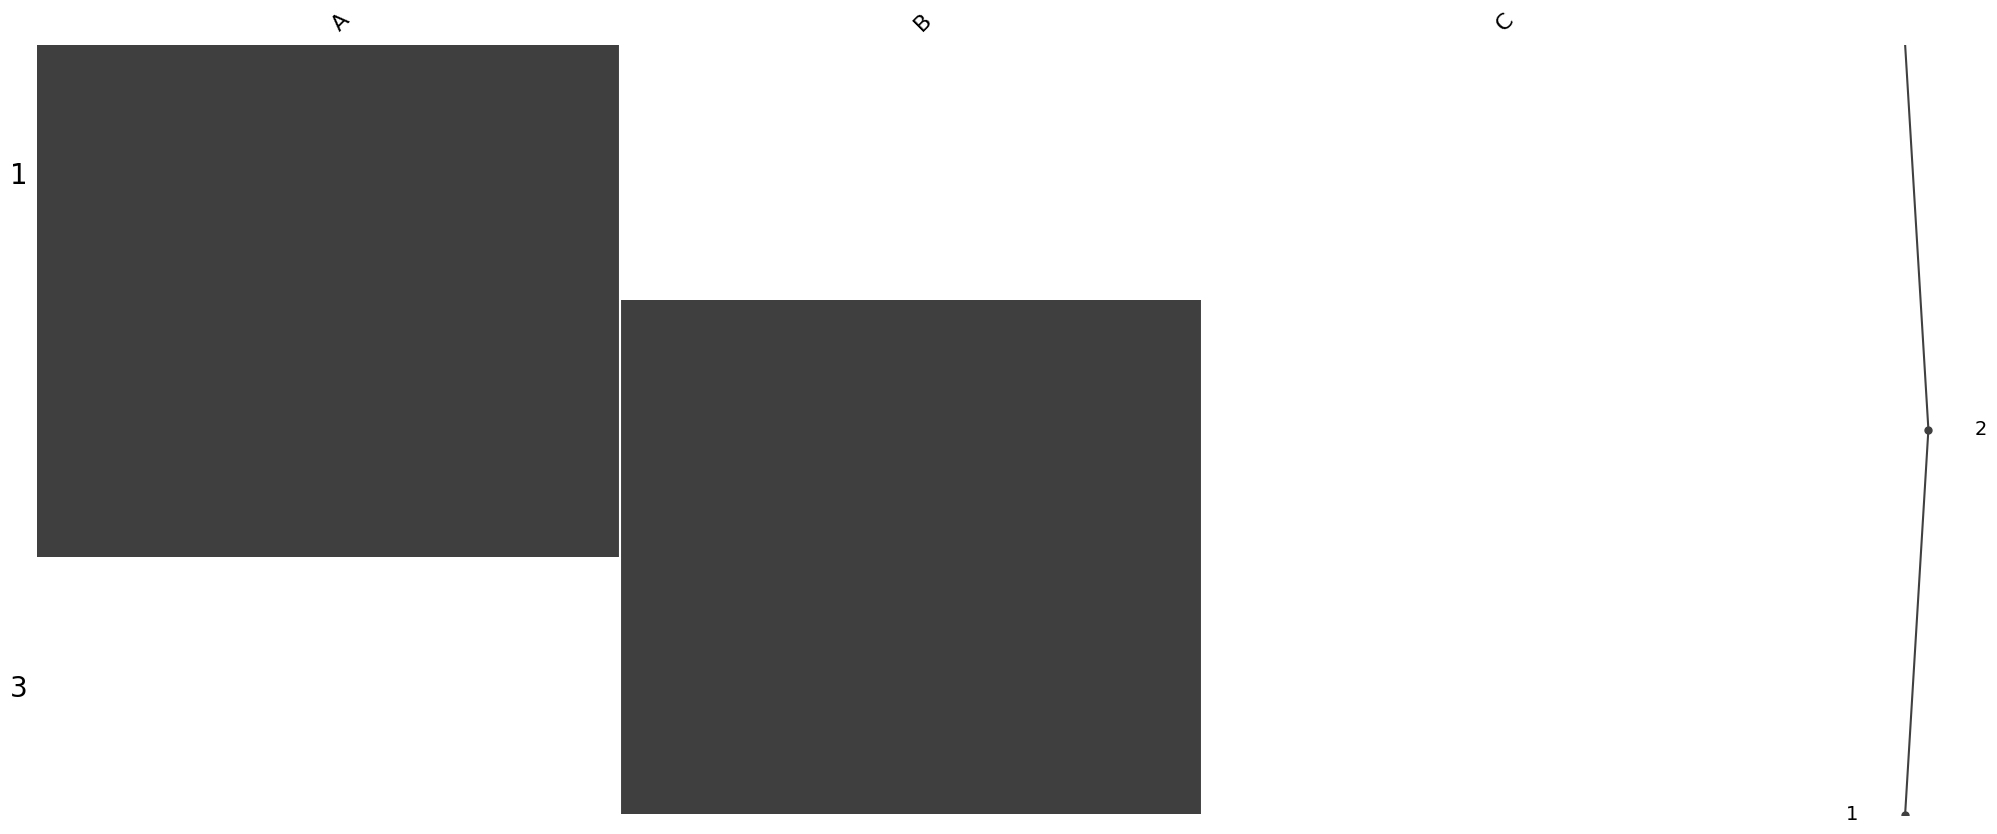

In [ ]:
# 결측 데이터 시각화
import missingno

missingno.matrix(df)

In [ ]:
# 일산화탄소(CO) 시계열 시각화
df['CO(GT)'].plot()

In [ ]:
# 결측치 대치
imp_locf = df['CO(GT)'].copy().ffill() # LOCF
imp_nocb = df['CO(GT)'].copy().bfill() # NOCB
imp_linear = df['CO(GT)'].copy().interpolate() # 선형 보간
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())  # 평균값 대체

In [ ]:
# K-NN 대치
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)    # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)

In [ ]:
# K-NN 대치 결과 변환(ndarray -> DataFrame)
imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)

In [ ]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()